# Lending Club Case Study - Exploratory Data Analysis

##### Group Members: 
1. Sunny Prakash
2. Sudhir Wani

### Assignment Brief:

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant's profile. Two **types of risks** are associated with the bank's decision:
- If the applicant is **likely to repay the loan**, then not approving the loan results in a **loss of business** to the company
- If the applicant is **not likely to repay the loan**, i.e. he/she is likely to default, then approving the loan may lead to a **financial loss** for the company

When a person applies for a loan, there are two types of decisions that could be taken by the company:

**1. Loan accepted:** If the company approves the loan, there are 3 possible scenarios described below:

- **Fully paid:** Applicant has fully paid the loan (the principal and the interest rate)

- **Current:** Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.

- **Charged-off:** Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 

**2. Loan rejected:** The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)

### Business Objectives:
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface.

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). Credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who **default** cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'.

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

In other words, the company wants to understand the **driving factors (or driver variables)** behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment.
ssessment. lio and risk assessment. 



## Exploratory Data Analysis

**_Let's start with importing all the required libraries for the analysis._**

In [8]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
import warnings
warnings.filterwarnings('ignore') # to ignore the warnings

**_Reading the loan data file._**

In [10]:
df = pd.read_csv("loan.csv")

In [11]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [12]:
df.shape

(39717, 111)

#  Data Cleaning

**_Missing values per column expressed as % of total number of values_**

In [15]:
round(100*df.isnull().sum()/len(df),2)

id                              0.0
member_id                       0.0
loan_amnt                       0.0
funded_amnt                     0.0
funded_amnt_inv                 0.0
                              ...  
tax_liens                       0.1
tot_hi_cred_lim               100.0
total_bal_ex_mort             100.0
total_bc_limit                100.0
total_il_high_credit_limit    100.0
Length: 111, dtype: float64

**_There are many columns in the data with 100% missing values. Lets remove all the columns with more than 50% missing values._**

In [17]:
columns_with_missing_values = [col for col in df.columns  if 100*(df[col].isnull().sum()/len(df))>=50]
columns_with_missing_values

['mths_since_last_delinq',
 'mths_since_last_record',
 'next_pymnt_d',
 'mths_since_last_major_derog',
 'annual_inc_joint',
 'dti_joint',
 'verification_status_joint',
 'tot_coll_amt',
 'tot_cur_bal',
 'open_acc_6m',
 'open_il_6m',
 'open_il_12m',
 'open_il_24m',
 'mths_since_rcnt_il',
 'total_bal_il',
 'il_util',
 'open_rv_12m',
 'open_rv_24m',
 'max_bal_bc',
 'all_util',
 'total_rev_hi_lim',
 'inq_fi',
 'total_cu_tl',
 'inq_last_12m',
 'acc_open_past_24mths',
 'avg_cur_bal',
 'bc_open_to_buy',
 'bc_util',
 'mo_sin_old_il_acct',
 'mo_sin_old_rev_tl_op',
 'mo_sin_rcnt_rev_tl_op',
 'mo_sin_rcnt_tl',
 'mort_acc',
 'mths_since_recent_bc',
 'mths_since_recent_bc_dlq',
 'mths_since_recent_inq',
 'mths_since_recent_revol_delinq',
 'num_accts_ever_120_pd',
 'num_actv_bc_tl',
 'num_actv_rev_tl',
 'num_bc_sats',
 'num_bc_tl',
 'num_il_tl',
 'num_op_rev_tl',
 'num_rev_accts',
 'num_rev_tl_bal_gt_0',
 'num_sats',
 'num_tl_120dpd_2m',
 'num_tl_30dpd',
 'num_tl_90g_dpd_24m',
 'num_tl_op_past_12m',


In [18]:
df_loan = df.drop(columns_with_missing_values,axis=1)
df_loan.shape

(39717, 54)

**_Remove columns with only one unique value and those where all values are unique, as these columns do not provide useful information for analysis._**

In [20]:
unique_Columns = [col for col in df_loan.columns  if df_loan[col].nunique() == len(df_loan) or df_loan[col].nunique() == 1]
unique_Columns

['id',
 'member_id',
 'pymnt_plan',
 'url',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [21]:
df_loan.drop(unique_Columns,axis=1,inplace=True)
df_loan.shape

(39717, 42)

**_After removing such columns. 42 columns remain._**

_Since we want to find variables of loan that may point towards loan status of 'charged-off', 
<br> Following columns does not make much sense for analysis_

- _**emp_title:** since this is the title_
- _**desc:** only required for sentimental analysis_
- _**title:** since this is title_
- _**zip_code:** since zip code does not affect analysis_
- _**earliest_cr_line:** The opening month the borrower's earliest reported credit line does not seem to affect loan status_
- _**total_rec_prncp:** Recovery principal doesn't seem to affect analysis_
- _**total_rec_int:** Recovery interest doesn't seem to affect analysis_
- _**total_rec_late_fee:** Recovery late fee doesn't seem to affect analysis_
- _**collection_recovery_fee:** post charge-off collection fee doesn't seem to affect analysis_
- _**last_pymnt_amnt:** This does not seem to affect analysis_
- _**last_pymnt_d:** This does not seem to affect analysis_
- _**last_credit_pull_d:** This does not seem to affect analysis_
- _**out_prncp:** outstanding principals are present only for current loans_
- _**out_prncp_inv:** outstanding principals are present only for current loans_

In [23]:
# drop columns that are not required for analysis
df_loan = df_loan.drop(columns = ['emp_title','desc','title','zip_code','earliest_cr_line',
             'out_prncp','out_prncp_inv','total_rec_prncp','total_rec_int','total_rec_late_fee',
             'collection_recovery_fee','last_pymnt_amnt','last_pymnt_d','last_credit_pull_d'])
df_loan.shape

(39717, 28)

**_Let's examin further for missing values._**

In [25]:
columns_with_missing_values = round(100*(df_loan.isnull().sum()/len(df_loan)), 2)
columns_with_missing_values[columns_with_missing_values != 0]

emp_length              2.71
revol_util              0.13
pub_rec_bankruptcies    1.75
dtype: float64

**_Since the percentage of missing values is very low (less than 3%), we can impute the missing values in this case._**

**_Employment details are important for assessing a borrower’s risk, and imputation ensures we don't lose this information._**

In [28]:
# Imputing the emp_length column with mode value
df_loan['emp_length'].fillna(df_loan['emp_length'].mode()[0], inplace=True)

**_Revolving credit utilization is important in determining a borrower’s risk, and any missing values should be handled._**

In [30]:
# First convert revol_util column form string to numeric type
df_loan['revol_util'] = df_loan['revol_util'].str.strip('%').astype('float')

In [31]:
# Imputing missing values with mean value
df_loan['revol_util'].fillna(df_loan['revol_util'].mean(), inplace=True)

**_Public records of bankruptcies can significantly impact a borrower's creditworthiness and risk profile. As majority of the pub_rec_bankruptcies records show 0 bankruptcies, so assuming the missing values are likely to represent no bankruptcies. In this case, imputing missing values with 0._**

In [33]:
df_loan['pub_rec_bankruptcies'].value_counts()

pub_rec_bankruptcies
0.0    37339
1.0     1674
2.0        7
Name: count, dtype: int64

In [34]:
df_loan['pub_rec_bankruptcies'].fillna(0, inplace=True)

In [35]:
# Again checking the Missing values per column expressed as % of total number of values
100*(df_loan.isnull().sum()/len(df_loan))

loan_amnt               0.0
funded_amnt             0.0
funded_amnt_inv         0.0
term                    0.0
int_rate                0.0
installment             0.0
grade                   0.0
sub_grade               0.0
emp_length              0.0
home_ownership          0.0
annual_inc              0.0
verification_status     0.0
issue_d                 0.0
loan_status             0.0
purpose                 0.0
addr_state              0.0
dti                     0.0
delinq_2yrs             0.0
inq_last_6mths          0.0
open_acc                0.0
pub_rec                 0.0
revol_bal               0.0
revol_util              0.0
total_acc               0.0
total_pymnt             0.0
total_pymnt_inv         0.0
recoveries              0.0
pub_rec_bankruptcies    0.0
dtype: float64

**_No missing values are present after data imputation._**

**_Checking the datatypes of the columns_**

In [38]:
df_loan.dtypes

loan_amnt                 int64
funded_amnt               int64
funded_amnt_inv         float64
term                     object
int_rate                 object
installment             float64
grade                    object
sub_grade                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
issue_d                  object
loan_status              object
purpose                  object
addr_state               object
dti                     float64
delinq_2yrs               int64
inq_last_6mths            int64
open_acc                  int64
pub_rec                   int64
revol_bal                 int64
revol_util              float64
total_acc                 int64
total_pymnt             float64
total_pymnt_inv         float64
recoveries              float64
pub_rec_bankruptcies    float64
dtype: object

**_Remove % sign from int_rate column to convert it to numeric type_**

In [40]:
df_loan['int_rate'] = df_loan['int_rate'].str.strip('%').astype('float')

In [41]:
df_loan['int_rate'].dtypes

dtype('float64')

**_Extract the year and month from the 'issue_d' column
<br> This will create a new column 'issue_year' and 'issue_month' containing the year and the numeric month_**

In [43]:
df_loan['issue_year'] = pd.to_datetime(df_loan['issue_d'], format='%b-%y').dt.year
df_loan['issue_month'] = pd.to_datetime(df_loan['issue_d'], format='%b-%y').dt.month

#  Outlier detection and data cleaning after Identifying Outliers

**_First Separate out numeric and non-numeric columns_**

In [46]:
df_numeric = df_loan.select_dtypes(include=[np.number])
df_non_numeric = df_loan.select_dtypes(exclude=[np.number])

In [47]:
df_non_numeric.columns.tolist()

['term',
 'grade',
 'sub_grade',
 'emp_length',
 'home_ownership',
 'verification_status',
 'issue_d',
 'loan_status',
 'purpose',
 'addr_state']

In [48]:
df_numeric.columns.tolist()

['loan_amnt',
 'funded_amnt',
 'funded_amnt_inv',
 'int_rate',
 'installment',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'inq_last_6mths',
 'open_acc',
 'pub_rec',
 'revol_bal',
 'revol_util',
 'total_acc',
 'total_pymnt',
 'total_pymnt_inv',
 'recoveries',
 'pub_rec_bankruptcies',
 'issue_year',
 'issue_month']

**_Checking the summary statistics of relevent numerical variables_**

In [50]:
df_loan[['loan_amnt','int_rate','annual_inc','dti','revol_bal','revol_util','delinq_2yrs','pub_rec']].describe()

,loan_amnt,int_rate,annual_inc,dti,revol_bal,revol_util,delinq_2yrs,pub_rec
count,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000
mean,11219.443815,12.021177,6.896893e+04,13.315130,13382.528086,48.832152,0.146512,0.055065
std,7456.670694,3.724825,6.379377e+04,6.678594,15885.016641,28.314793,0.491812,0.237200
min,500.000000,5.420000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5500.000000,9.250000,4.040400e+04,8.170000,3703.000000,25.500000,0.000000,0.000000
50%,10000.000000,11.860000,5.900000e+04,13.400000,8850.000000,49.200000,0.000000,0.000000
75%,15000.000000,14.590000,8.230000e+04,18.600000,17058.000000,72.300000,0.000000,0.000000
max,35000.000000,24.590000,6.000000e+06,29.990000,149588.000000,99.900000,11.000000,4.000000


**_The summary statistics highlight some potential outliers in the dataset:_**

- **_Loan Amount (loan_amnt):_** The maximum value is ₹35,000, which seems reasonable, and no extreme outliers are evident in this field.
- **_Interest Rate (int_rate):_** Ranges from 5.42% to 24.59%, which is within expected bounds for most lending environments.
- **_Annual Income (annual_inc):_** The maximum income is ₹6 million, which is highly unusual compared to the mean of ₹68,968. This value likely represents an outlier.
- **_Debt-to-Income Ratio (dti):_** The values range from 0 to 29.99%, which seems acceptable, but extremely low values (0%) might warrant further scrutiny.
- **_Revolving Balance (revol_bal):_** The maximum value is ₹149,588, which is significantly higher than the 75th percentile (₹17,058), indicating potential outliers.
- **_Revolving Utilization (revol_util):_** A maximum of 99.9% could indicate customers at the brink of credit exhaustion, which may not need removal but can be flagged for closer monitoring.
- **_Delinquencies (delinq_2yrs) and Public Records (pub_rec):_** Most borrowers have 0 delinquencies or public records, but a few have as many as 11 delinquencies or 4 public records, which could be flagged as risky rather than removed.


**_Based on these findings, outliers for potential removal or further analysis could be:_**

- **_Annual Income_**
- **_Revolving Balance_**


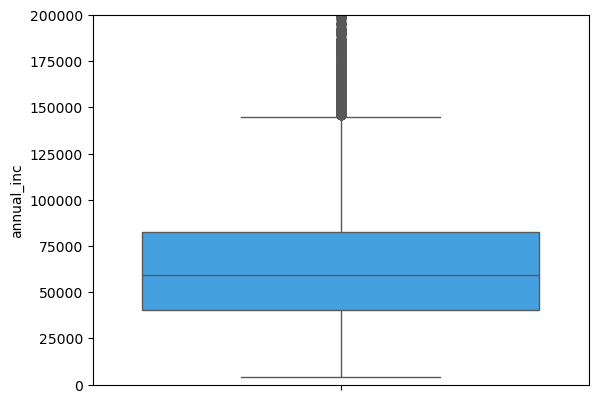

In [53]:
# Let plot box plots of 'annual_inc'
sns.boxplot(y='annual_inc', data=df_loan,color='#2BA5FA')
plt.ylim(0, 200000)
plt.show()

In [54]:
# Remove outliers from 'annual_inc' column
upper_whisker = df_loan['annual_inc'].quantile(0.75) + 1.5 * (df_loan['annual_inc'].quantile(0.75) - df_loan['annual_inc'].quantile(0.25))
lower_whisker = df_loan['annual_inc'].quantile(0.25) - 1.5 * (df_loan['annual_inc'].quantile(0.75) - df_loan['annual_inc'].quantile(0.25))
df_loan = df_loan[df_loan['annual_inc'] <= upper_whisker]
df_loan = df_loan[df_loan['annual_inc'] >= lower_whisker]

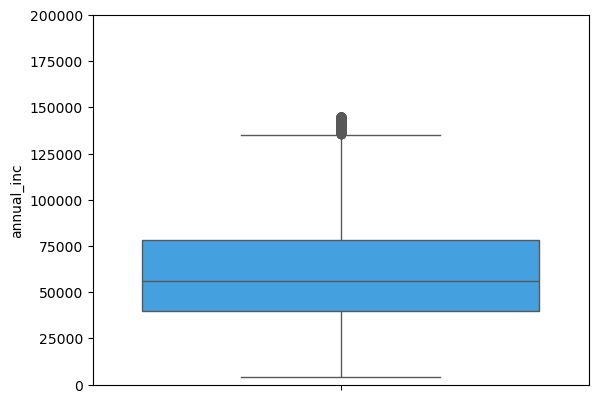

In [55]:
# Let plot box plots of 'annual_inc' after removing outliers
sns.boxplot(y='annual_inc', data=df_loan,color='#2BA5FA')
plt.ylim(0, 200000)
plt.show()

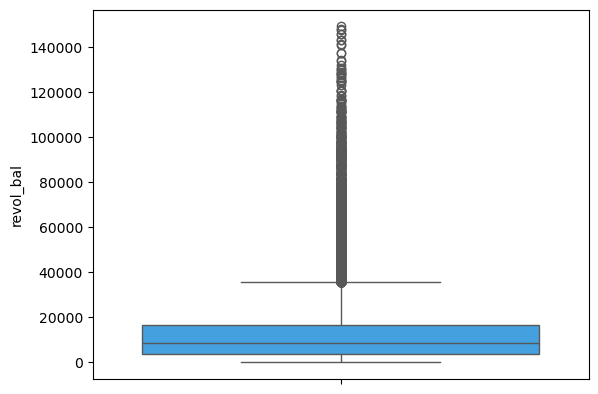

In [56]:
# Let plot box plots of 'revol_bal'
sns.boxplot(y='revol_bal', data=df_loan,color='#2BA5FA')
plt.show()

In [57]:
# Remove outliers from 'revol_bal' column
upper_whisker = df_loan['revol_bal'].quantile(0.75) + 1.5 * (df_loan['revol_bal'].quantile(0.75) - df_loan['revol_bal'].quantile(0.25))
lower_whisker = df_loan['revol_bal'].quantile(0.25) - 1.5 * (df_loan['revol_bal'].quantile(0.75) - df_loan['revol_bal'].quantile(0.25))
df_loan = df_loan[df_loan['revol_bal'] <= upper_whisker]
df_loan = df_loan[df_loan['revol_bal'] >= lower_whisker]

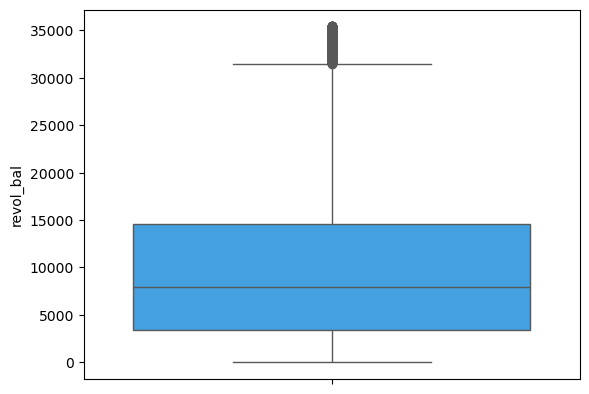

In [58]:
# Let plot box plots of 'revol_bal' after removing outliers
sns.boxplot(y='revol_bal', data=df_loan,color='#2BA5FA')
plt.show()

**_Plot the heatmap of selected numerical columns to find if there is any correlation_**

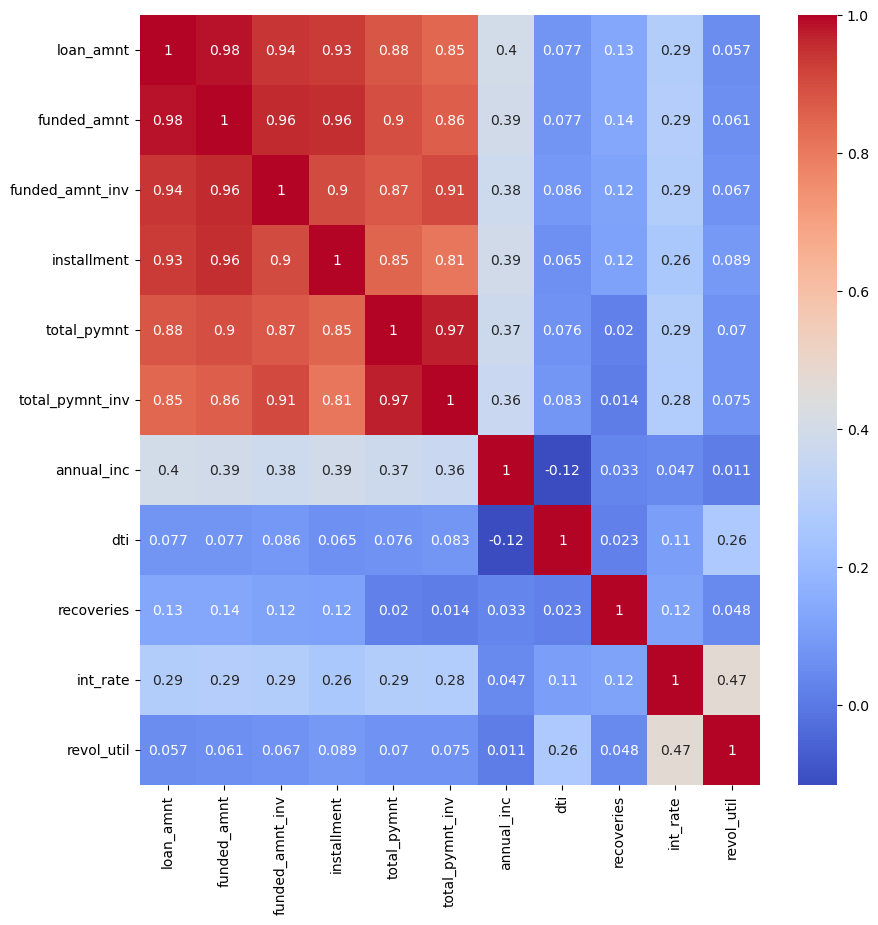

In [60]:
fig, ax = plt.subplots(figsize=(10,10))
columns_to_plot = ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'installment','total_pymnt', 'total_pymnt_inv', 'annual_inc', 'dti', 'recoveries','int_rate', 'revol_util']
sns.heatmap(df_loan[columns_to_plot].corr(),cmap='coolwarm',annot=True,ax=ax)
plt.show()

**_Observation:_** 
- _loan_amnt is highly correlated with funded_amnt, funded_amnt_inv and installment so analyze only on loan_amnt_
- _total_pymnt and total_pymnt_inv are highly correlated so analyze only on total_pymnt_

In [62]:
# Remove highly correlated columns from dataframe
df_loan = df_loan.drop(columns=['funded_amnt','funded_amnt_inv','installment','total_pymnt_inv'])

In [63]:
# checking the shape of the data
df_loan.shape

(35754, 26)

In [64]:
# Lets cut numerical columns into buckets for further analysis

# cut loan_amnt into buckets
df_loan['loan_amnt_cut'] = pd.cut(df_loan['loan_amnt'],
                              [0, 5000, 10000, 15000, 20000,25000, 30000, 35000],
                             labels=['0-5000', '5000-10000', '10000-15000', '15000-20000', '20000-25000','25000-30000','30000-35000'])

# cut annual_inc into buckets
df_loan['annual_inc_cut'] = pd.cut(df_loan['annual_inc'],
                              [0, 20000, 40000, 60000, 80000,100000, 120000, 140000],
                              labels=['0-20000', '20000-40000', '40000-60000', '60000-80000', '80000-100000','100000-120000','120000-140000'])

# cut int_rate into buckets
df_loan['int_rate_cut'] = pd.cut(df_loan['int_rate'],
                              [5, 7.5, 10, 12.5, 15, 17.5, 20, 22.5, 25],
                              labels=['5-7.5', '7.5-10', '10-12.5', '12.5-15', '15-17.5','17.5-20','20-22.5','22.5-25'])
# cut revol_util into buckets
df_loan['revol_util_cut'] = pd.cut(df_loan['revol_util'],
                              [0, 15, 30, 45, 60, 75, 90, 100],
                              labels=['0-15', '15-30', '30-45', '45-60', '60-75','75-90','90-100'])

# cut dti into buckets
df_loan['dti_cut'] = pd.cut(df_loan['dti'],
                       [0,4,8,12,16,20,24,28,30],
                       labels=['0-4','4-8','8-12','12-16','16-20','20-24','24-28','28-30'])


# Univariate Analysis

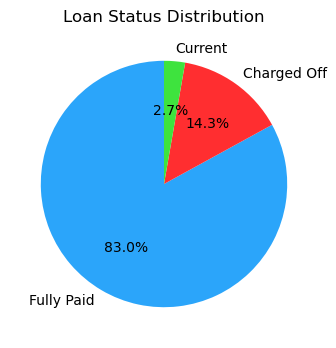

In [66]:
#Lets plot pie chart to look at the distribution of the loan status
plt.figure(figsize=(4, 4))
plt.pie(df_loan['loan_status'].value_counts(), labels=df_loan['loan_status'].value_counts().index, autopct='%1.1f%%', startangle=90, colors=['#2BA5FA','#FF2E30','#3EE33E'])
plt.title('Loan Status Distribution')
plt.show()

**_Observation:_** _Above chart shows 14% loans were charged off out of total loans_

**_Checking distribution of data for Loan Amount_**

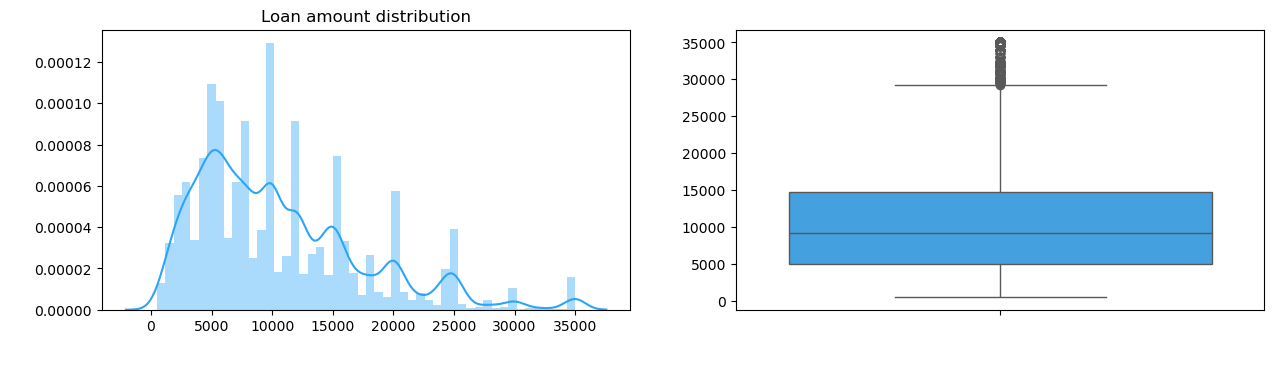

In [69]:
plt.figure(figsize=(15,8))
#sns.set_style("dark")
plt.subplot(2,2,1)
ax = sns.distplot(df_loan['loan_amnt'],color='#2BA5FA')
ax.set_title('Loan amount distribution')
ax.set_xlabel('Loan amount',fontsize=14,color='w')
ax.set_ylabel('Frequency',fontsize=14,color='w')
plt.subplot(2,2,2)
ax = sns.boxplot(y='loan_amnt',data=df_loan,color='#2BA5FA')
ax.set_ylabel('Loan amount',fontsize=14,color='w')
plt.show()

**_Observation:_** _From the histogram and boxplot it is clear that most of the loan amounts are between 5000 to 15000_

**_Checking distribution of data for Interest Rate_**

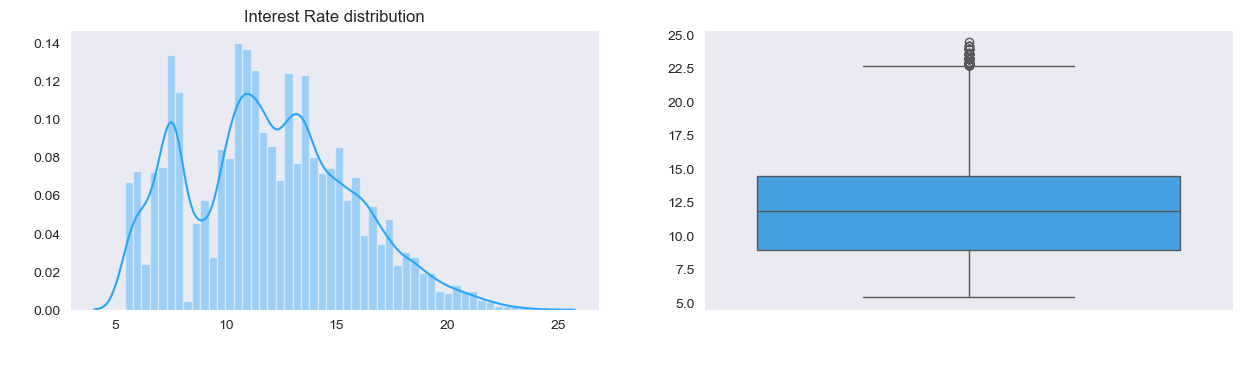

In [72]:
plt.figure(figsize=(15,8))
sns.set_style("dark")
plt.subplot(2,2,1)
ax = sns.distplot(df_loan['int_rate'],color='#2BA5FA')
ax.set_title('Interest Rate distribution')
ax.set_xlabel('Interest Rate',fontsize=14,color='w')
ax.set_ylabel('Frequency',fontsize=14,color='w')
plt.subplot(2,2,2)
ax = sns.boxplot(y='int_rate',data=df_loan,color='#2BA5FA')
ax.set_ylabel('Interest Rate',fontsize=14,color='w')
plt.show()

**_Observation:_** _From the frequency distribution it is clear that most of the loans are at interest rates between 10 to 16_

**_Checking distribution of data for Annual Income_**

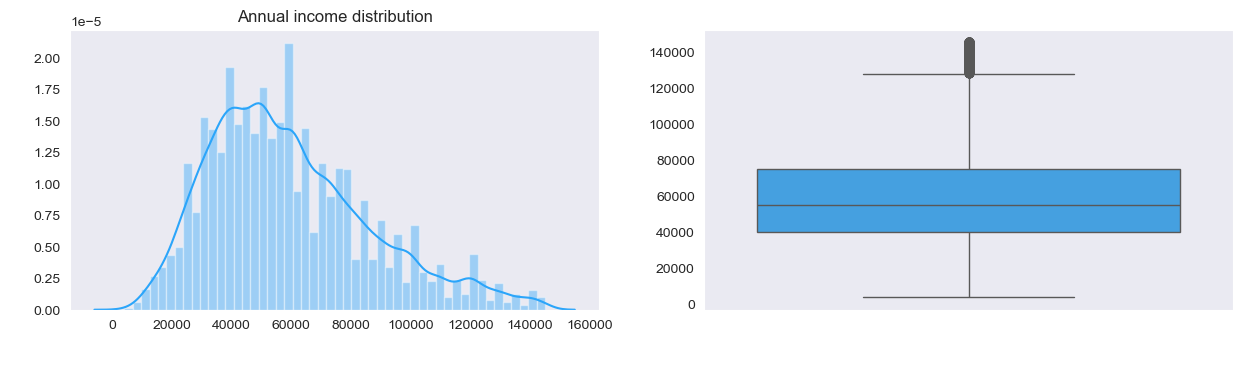

In [75]:
plt.figure(figsize=(15,8))
sns.set_style("dark")
plt.subplot(2,2,1)
ax = sns.distplot(df_loan['annual_inc'],color='#2BA5FA')
ax.set_title('Annual income distribution')
ax.set_xlabel('Annual Income',fontsize=14,color='w')
ax.set_ylabel('Frequency',fontsize=14,color='w')
plt.subplot(2,2,2)
ax = sns.boxplot(y='annual_inc',data=df_loan,color='#2BA5FA')
ax.set_ylabel('Annual Income',fontsize=14,color='w')
plt.show()

**_Observation:_** _From the frequency distribution it is clear that most of the borrower's annual income is between 30000 to 80000_

**_Lets plot the loan count per loan status per purpose_**

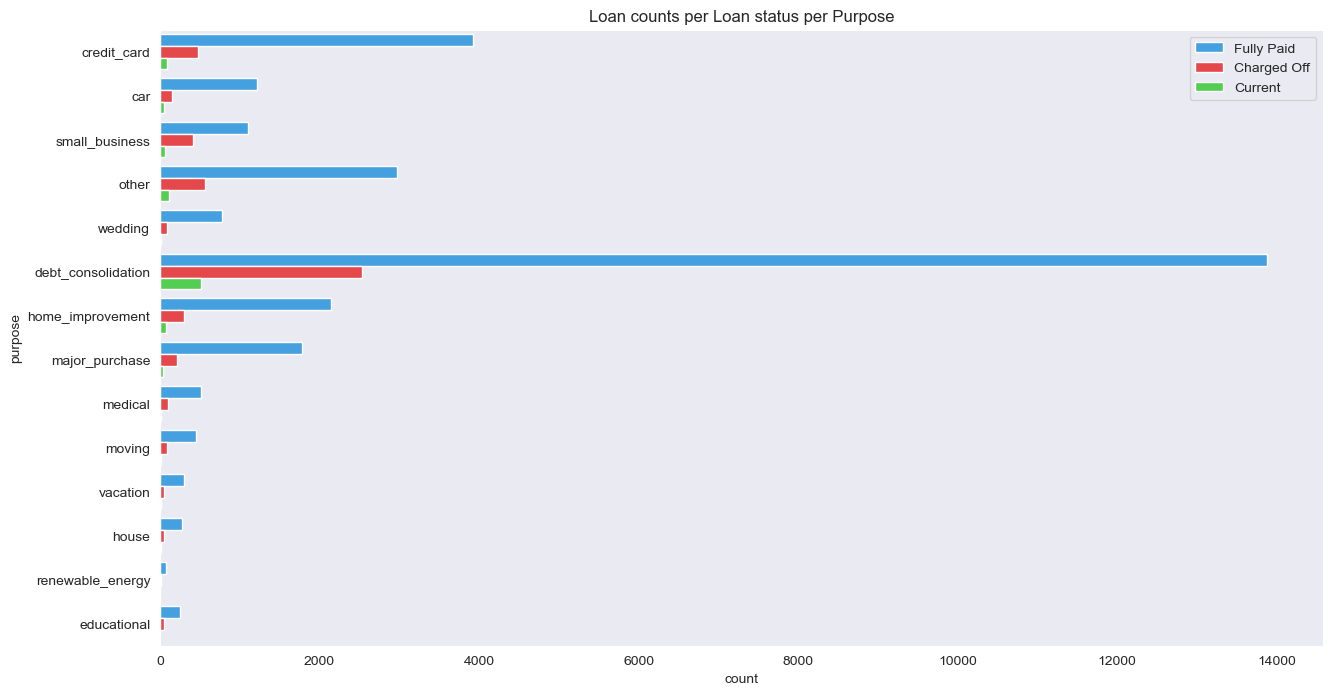

In [78]:
plt.figure(figsize=(15,8))
ax=sns.countplot(y="purpose",data=df_loan,hue='loan_status', palette=['#2BA5FA','#FF2E30','#3EE33E'])
ax.legend(bbox_to_anchor=(1,1))
ax.set_title('Loan counts per Loan status per Purpose')
plt.show()

**_Observation:_** _Most loans are of RENT and MORTGAGE categories_

**_Lets plot the loan count percentage per loan status per purpose_**

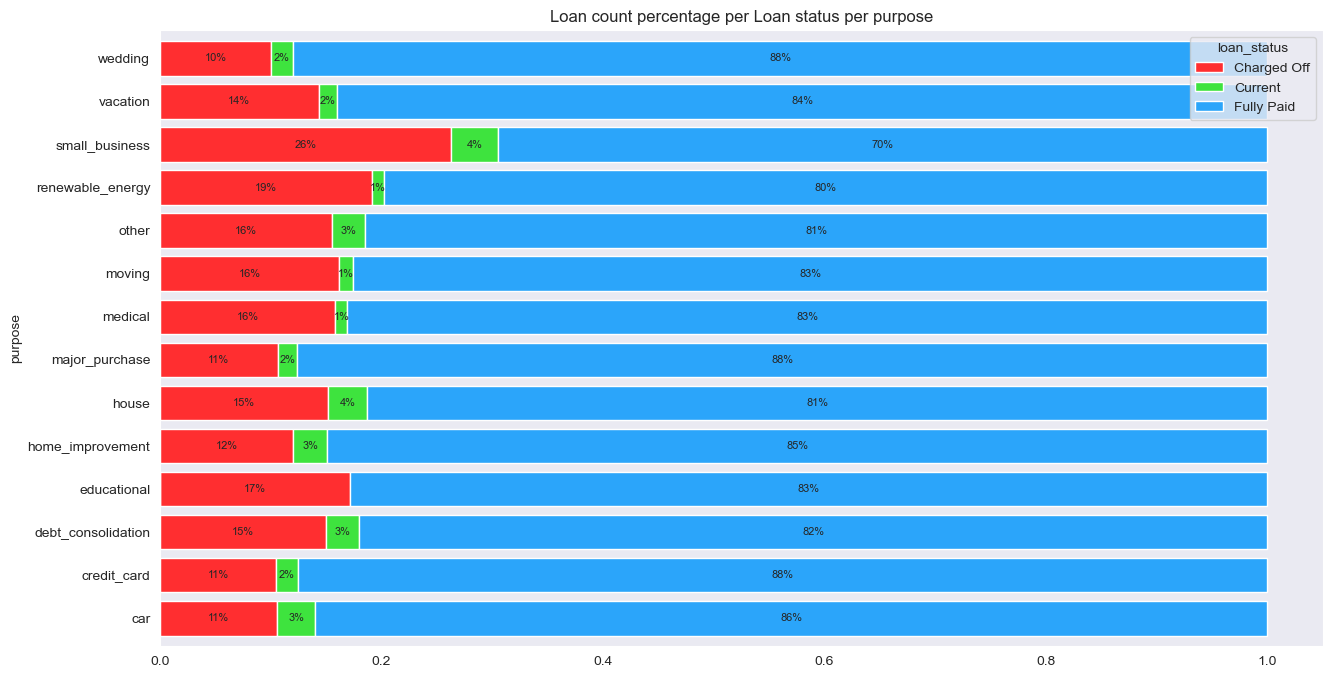

In [81]:
value_counts = df_loan.groupby('purpose')['loan_status'].value_counts(normalize=True)
# Plot value_counts as horizontal grouped bar chart
ax = value_counts.unstack().plot(kind='barh',stacked=True, width=0.8,figsize=(15,8),title="Loan count percentage per Loan status per purpose", color=['#FF2E30','#3EE33E','#2BA5FA'])
# annotations:
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width > 0:
         ax.annotate(f'{width*100:00.00f}%', xy=(left+width/2, bottom+height/2), ha='center', va='center', size=8)

**_Observation:_** _Loans taken for small business are more likely to get charged off than other purposes_

**_Lets plot loan counts per loan status per home ownership_**

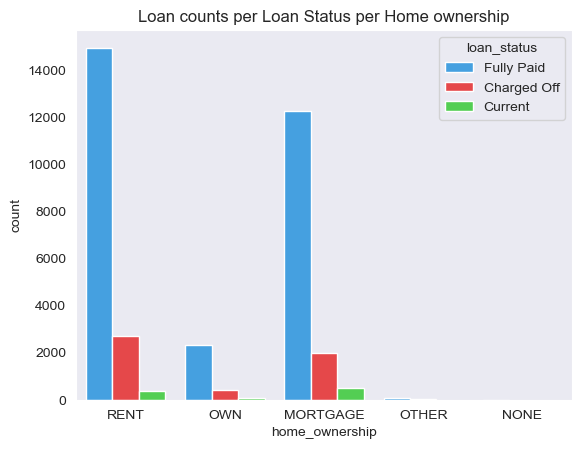

In [84]:
#plt.figure(figsize=(15,8))
sns.countplot(x='home_ownership', data=df_loan, hue='loan_status',palette=['#2BA5FA','#FF2E30','#3EE33E'])
plt.title("Loan counts per Loan Status per Home ownership")
plt.show()

**_Observation:_** _Most loans are of RENT and MORTGAGE categories._

**_Lets plot Loan count percentage per loan status per home ownership_**

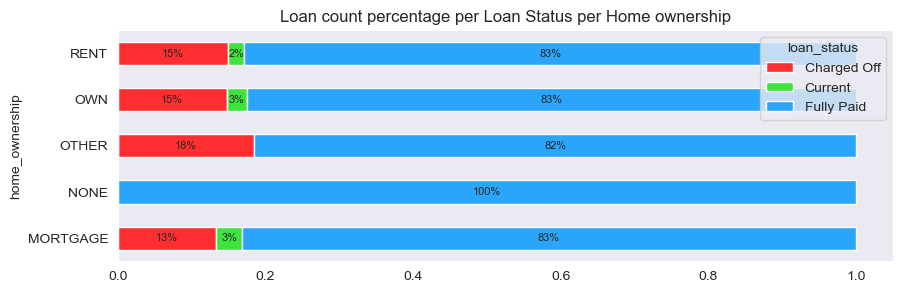

In [87]:
value_counts = df_loan.groupby('home_ownership')['loan_status'].value_counts(normalize=True)
# Plot value_counts as horizontal grouped bar chart
ax = value_counts.unstack().plot(kind='barh',stacked=True, width=0.5,figsize=(10,3),title="Loan count percentage per Loan Status per Home ownership", color=['#FF2E30','#3EE33E','#2BA5FA'])
# annotations:
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width > 0:
         ax.annotate(f'{width*100:00.00f}%', xy=(left+width/2, bottom+height/2), ha='center', va='center', size=8)

**_Observation:_** _Charged off percentage is almost similar accross all categories of home ownership_

**_Lets plot loan counts per loan status per term_**

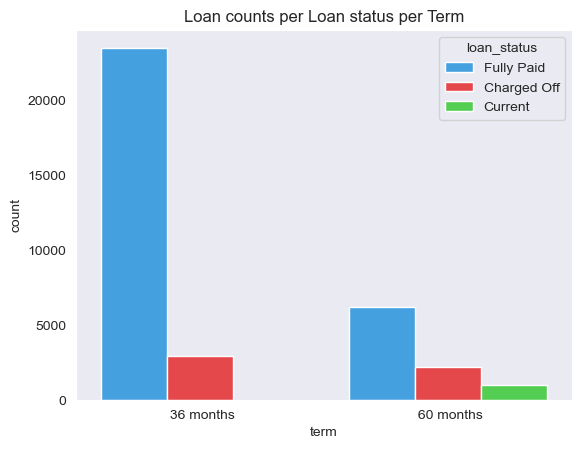

In [90]:
sns.countplot(x='term', data=df_loan, hue='loan_status',palette=['#2BA5FA','#FF2E30','#3EE33E'])
plt.title("Loan counts per Loan status per Term")
plt.show()

**_Observation:_** _Loans with 36 month term are more than 60 month_

**_Lets plot loan count percentage per loan status per term_**

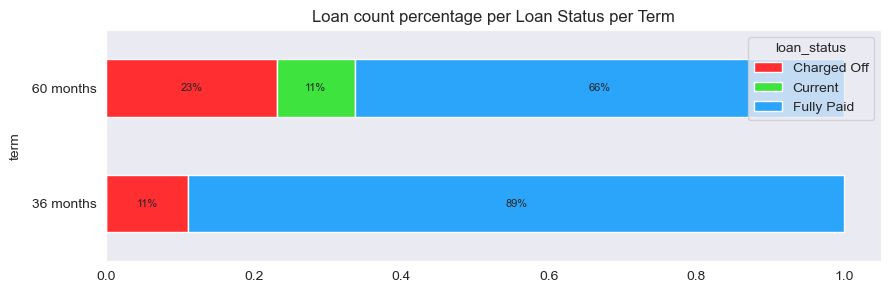

In [93]:
value_counts = df_loan.groupby('term')['loan_status'].value_counts(normalize=True)
# Plot value_counts as horizontal grouped bar chart
ax = value_counts.unstack().plot(kind='barh',stacked=True, width=0.5,figsize=(10,3),title="Loan count percentage per Loan Status per Term", color=['#FF2E30','#3EE33E','#2BA5FA'])
# annotations:
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width > 0:
         ax.annotate(f'{width*100:00.00f}%', xy=(left+width/2, bottom+height/2), ha='center', va='center', size=8)

**_Observation:_** _Loans with 60 month term are more likely to get charged off than 36 month_

**_Lets plot loan counts per loan status per grade_**

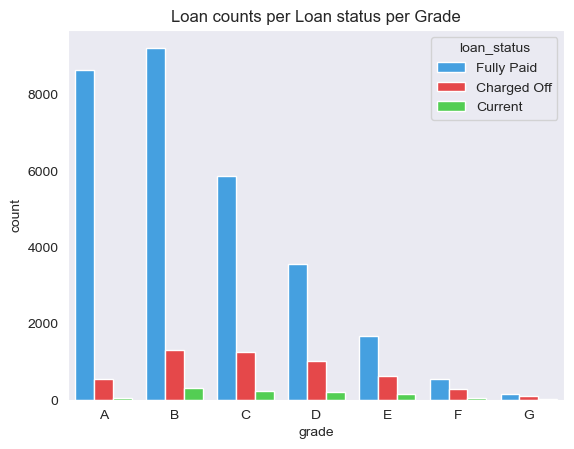

In [96]:
sns.countplot(x='grade', data=df_loan, hue='loan_status', order=['A','B','C','D','E','F','G'],palette=['#2BA5FA','#FF2E30','#3EE33E'])
plt.title("Loan counts per Loan status per Grade")
plt.show()

**_Observation:_** _Loan counts of higher grades are high in numbers_

**_Lets plot loan count percentage per loan status per grade_**

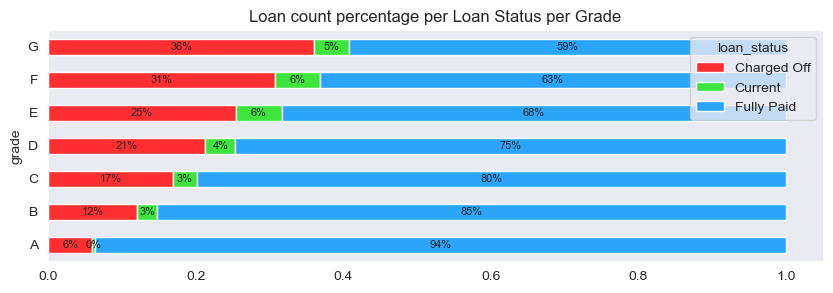

In [99]:
value_counts = df_loan.groupby('grade')['loan_status'].value_counts(normalize=True)
# Plot value_counts as horizontal grouped bar chart
ax = value_counts.unstack().plot(kind='barh',stacked=True, width=0.5,figsize=(10,3),title="Loan count percentage per Loan Status per Grade", color=['#FF2E30','#3EE33E','#2BA5FA'])
# annotations:
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width > 0:
         ax.annotate(f'{width*100:00.00f}%', xy=(left+width/2, bottom+height/2), ha='center', va='center', size=8)

**_Observation:_** _Lower grade loans are more likely to get charged off_

**_Lets plot loan counts per loan status per sub grade_**

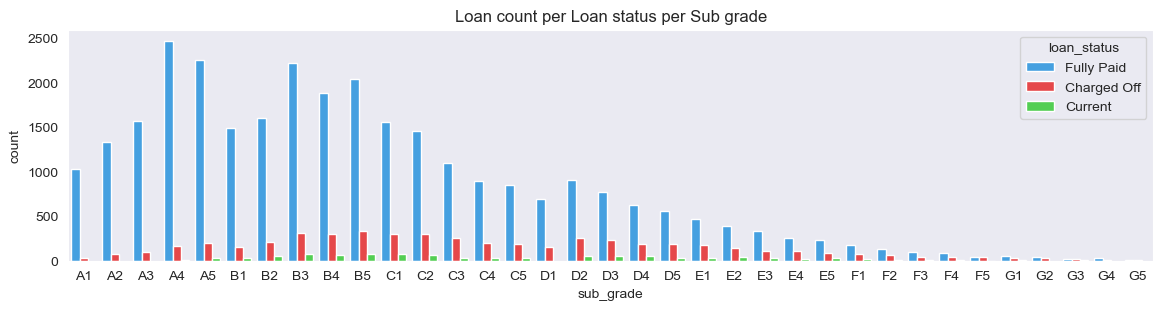

In [102]:
plt.figure(figsize=(14,3))
sns.countplot(x='sub_grade', data=df_loan, hue='loan_status',palette=['#2BA5FA','#FF2E30','#3EE33E'],order=['A1','A2','A3','A4','A5','B1','B2','B3','B4','B5','C1','C2','C3','C4','C5','D1','D2','D3','D4','D5','E1','E2','E3','E4','E5','F1','F2','F3','F4','F5','G1','G2','G3','G4','G5'])
plt.title("Loan count per Loan status per Sub grade")
plt.show()

**_Observation:_** _Loan counts of higher sub grades are high in numbers except for A & B grades_

**_Lets plot loan count percentage per loan status per sub grade_**

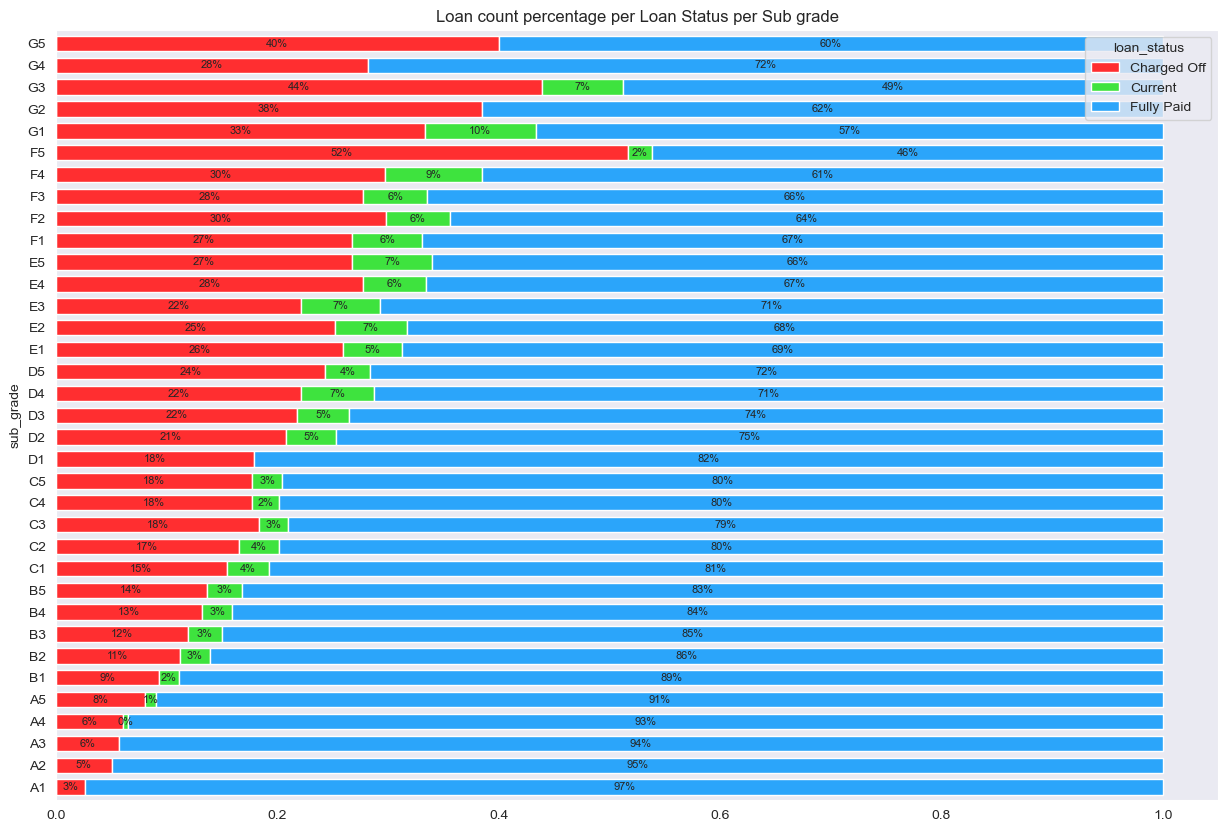

In [105]:
value_counts = df_loan.groupby('sub_grade')['loan_status'].value_counts(normalize=True)
# Plot value_counts as horizontal grouped bar chart
ax = value_counts.unstack().plot(kind='barh',stacked=True, width=0.7,figsize=(15,10),title="Loan count percentage per Loan Status per Sub grade", color=['#FF2E30','#3EE33E','#2BA5FA'])
# annotations:
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width > 0:
         ax.annotate(f'{width*100:00.00f}%', xy=(left+width/2, bottom+height/2), ha='center', va='center', size=8)

**_Observation:_** _Lower sub grade loans are more likely to get charged off_

**_Lets plot loan count per loan status per employment length_**

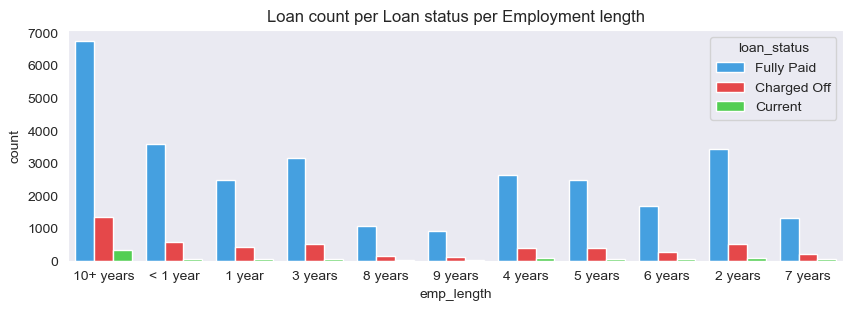

In [108]:
plt.figure(figsize=(10,3))
sns.countplot(x='emp_length', data=df_loan, hue='loan_status',palette=['#2BA5FA','#FF2E30','#3EE33E'])
plt.title("Loan count per Loan status per Employment length")
plt.show()

**_Observation:_** _Borrowers of 10+ years of experience are more than other category_

**_Lets plot count percentage per loan status per employment length_**

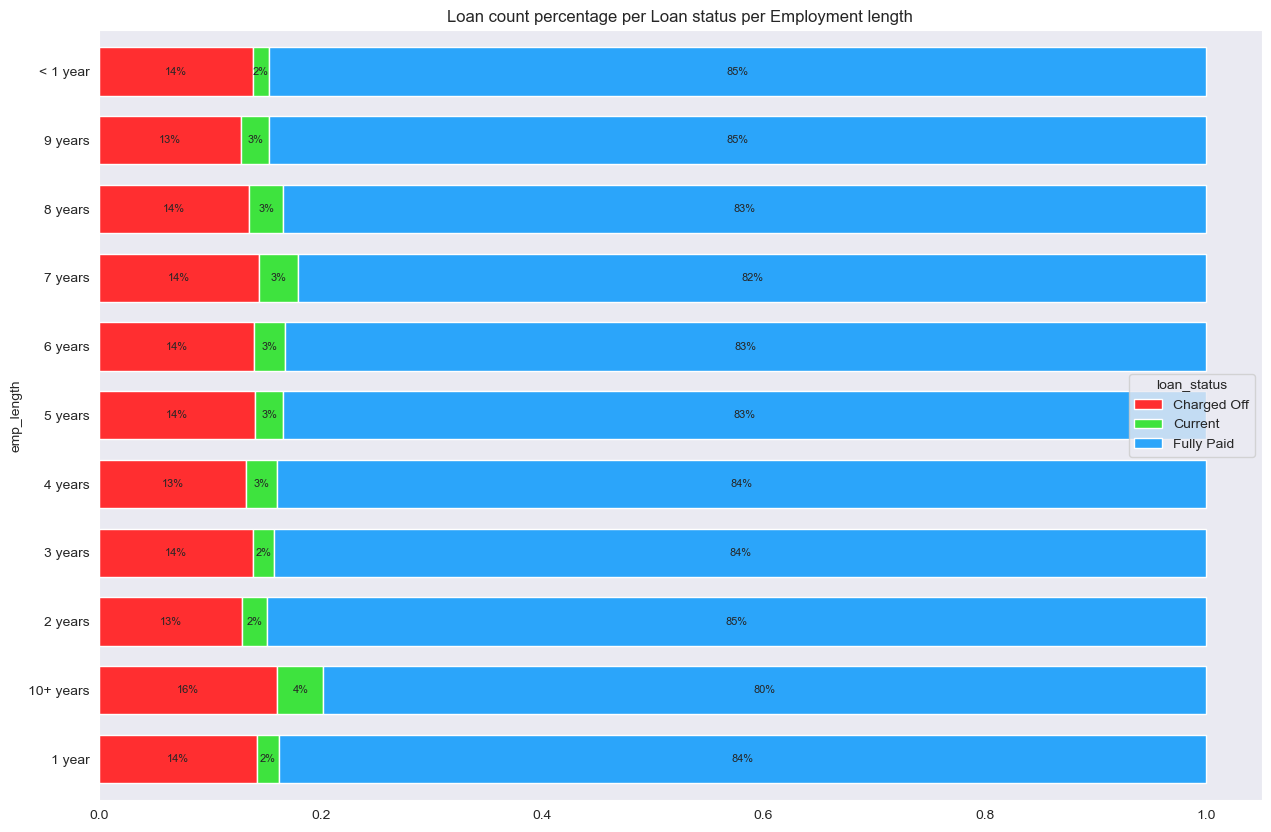

In [111]:
value_counts = df_loan.groupby('emp_length')['loan_status'].value_counts(normalize=True)
# Plot value_counts as horizontal grouped bar chart
ax = value_counts.unstack().plot(kind='barh',stacked=True, width=0.7,figsize=(15,10),title="Loan count percentage per Loan status per Employment length", color=['#FF2E30','#3EE33E','#2BA5FA'])
# annotations:
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width > 0:
         ax.annotate(f'{width*100:00.00f}%', xy=(left+width/2, bottom+height/2), ha='center', va='center', size=8)

**_Observation:_** _Charged off percentage does not depend on employment length, it is almost same (around 15%) for all categories_

**_Lets plot loan count per loan status per address state_**

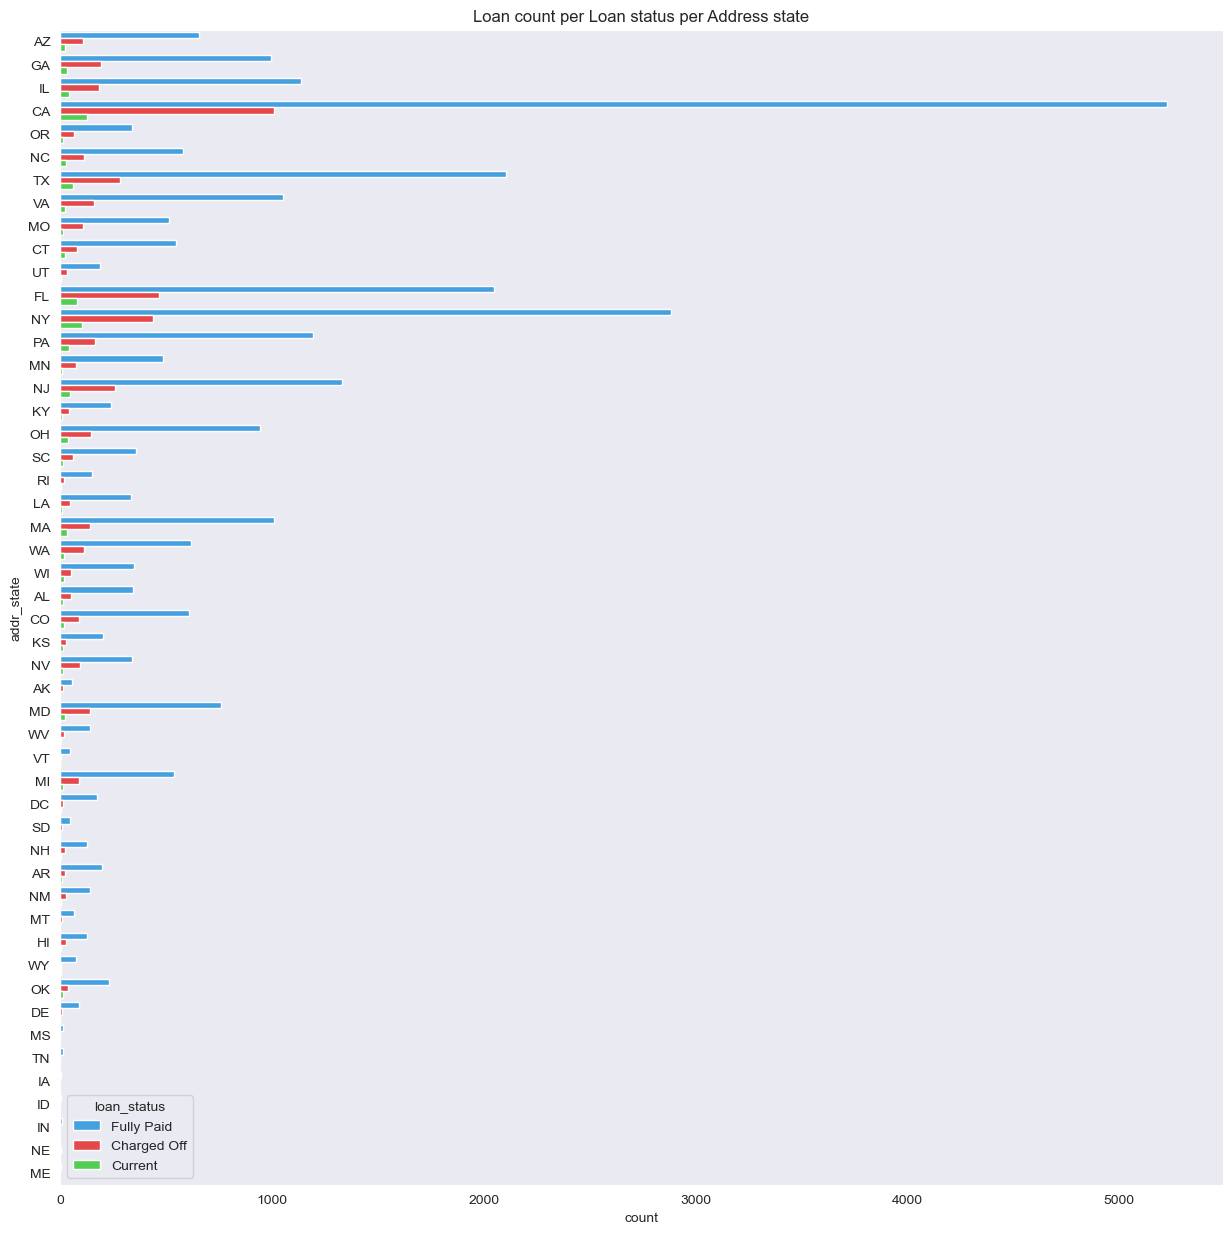

In [114]:
plt.figure(figsize=(15,15))
sns.countplot(y='addr_state', data=df_loan, hue='loan_status',palette=['#2BA5FA','#FF2E30','#3EE33E'])
plt.title("Loan count per Loan status per Address state")
plt.show()

**_Observation:_** _Loan count is highest for CA state, and second highest is for NY_

**_Lets plot count percentage per loan status per address state_**

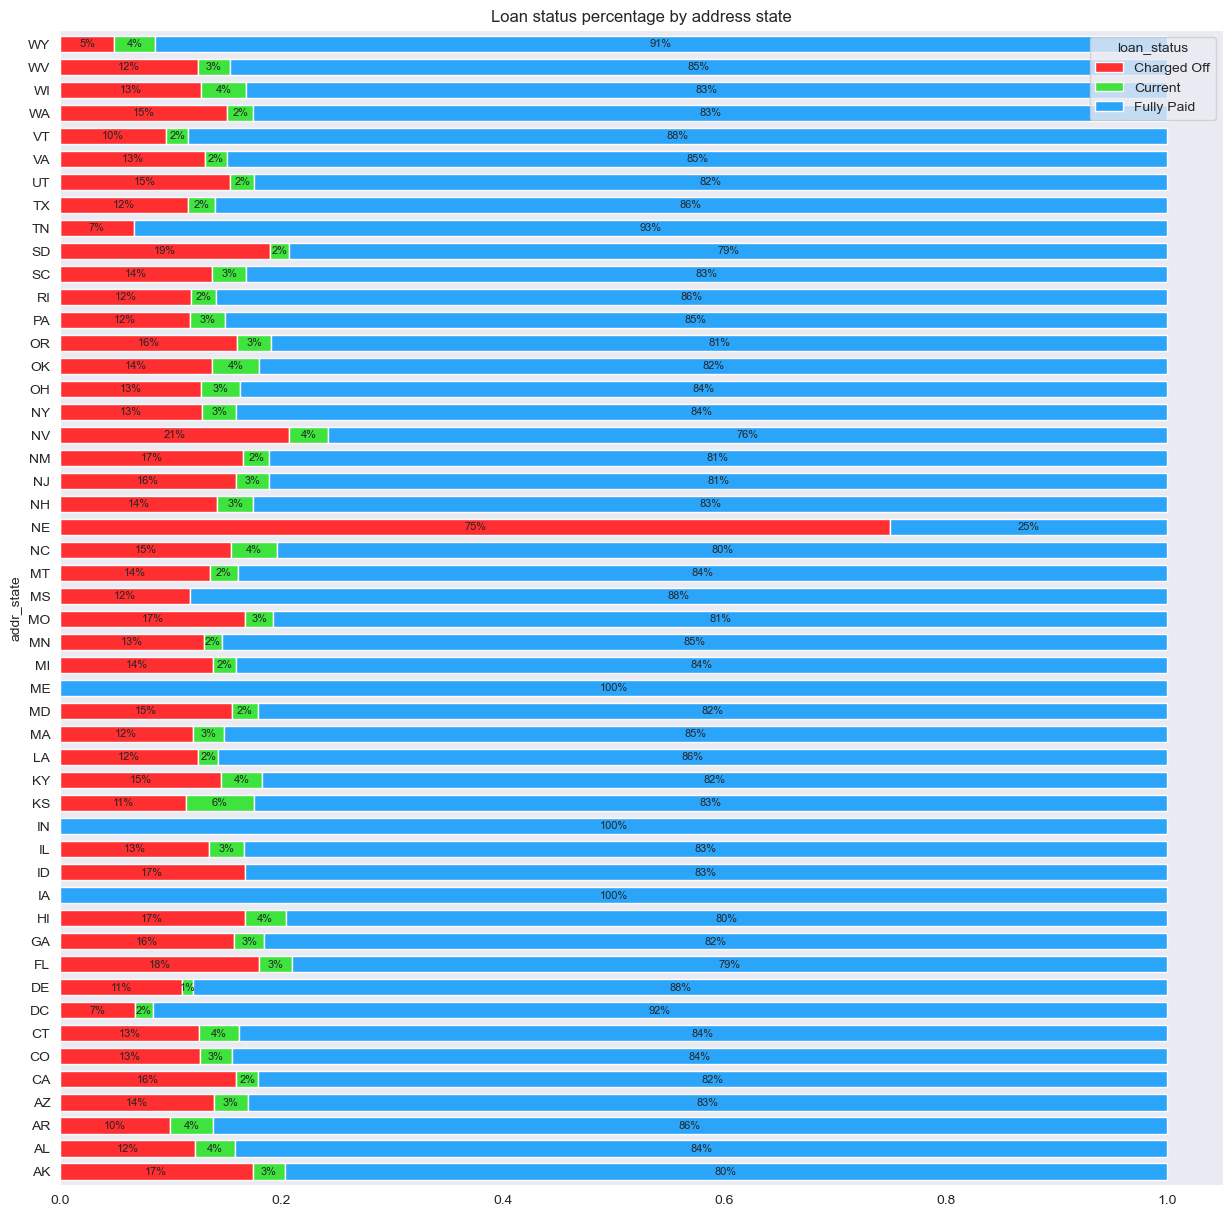

In [117]:
value_counts = df_loan.groupby('addr_state')['loan_status'].value_counts(normalize=True)
# Plot value_counts as horizontal grouped bar chart
ax = value_counts.unstack().plot(kind='barh',stacked=True, width=0.7,figsize=(15,15),title="Loan status percentage by address state", color=['#FF2E30','#3EE33E','#2BA5FA'])
# annotations:
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width > 0:
         ax.annotate(f'{width*100:00.00f}%', xy=(left+width/2, bottom+height/2), ha='center', va='center', size=8)

**_Observation:_** _Loans from NE state are most likely to get charged off, but they are very low in numbers_

**_Lets find out average charge off percentage across all states_**

In [120]:
value_counts = df.groupby('addr_state')['loan_status'].value_counts(normalize=True)
avg_charge_off_percentage = value_counts.unstack()['Charged Off'].mean() * 100
avg_charge_off_percentage

14.610742833660122

**_Lets find out states which have charge off percentage more than avg_charge_off_percentage_**

In [122]:
value_counts = df.groupby('addr_state')['loan_status'].value_counts(normalize=True)
states = value_counts.unstack()['Charged Off'] * 100
states_charge_off_per_flg = value_counts.unstack()['Charged Off'] * 100 > avg_charge_off_percentage
states[states_charge_off_per_flg == True].sort_values(ascending=False)
# Observation: Loans from following states have more than average charged off percentage

addr_state
NE    60.000000
NV    21.730382
SD    18.750000
AK    18.750000
FL    17.585485
ID    16.666667
MO    16.618076
HI    16.091954
NM    15.873016
CA    15.847302
OR    15.742794
UT    15.503876
MD    15.443279
GA    15.379113
WA    15.119048
NJ    15.027027
NH    14.619883
Name: Charged Off, dtype: float64

**_Observation:_** _Loans from above states have more than average charged off percentage_

**_Lets plot loan count per loan status per verification status_**

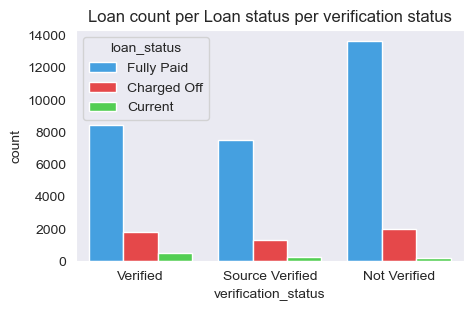

In [125]:
plt.figure(figsize=(5,3))
sns.countplot(x='verification_status', data=df_loan, hue='loan_status',palette=['#2BA5FA','#FF2E30','#3EE33E'])
plt.title("Loan count per Loan status per verification status")
plt.show()

**_Observation:_** _Loan status count is highest for Not Verified loans_

**_Lets plot loan count percentage per loan status per verification status_**

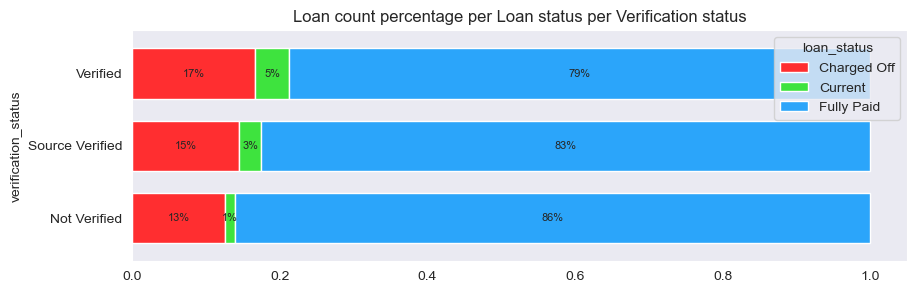

In [128]:
value_counts = df_loan.groupby('verification_status')['loan_status'].value_counts(normalize=True)
# Plot value_counts as horizontal grouped bar chart
ax = value_counts.unstack().plot(kind='barh',stacked=True, width=0.7,figsize=(10,3),title="Loan count percentage per Loan status per Verification status", color=['#FF2E30','#3EE33E','#2BA5FA'])
# annotations:
for p in ax.patches:
    left, bottom, width, height = p.get_bbox().bounds
    if width > 0:
         ax.annotate(f'{width*100:00.00f}%', xy=(left+width/2, bottom+height/2), ha='center', va='center', size=8)

**_Observation:_** _Charged off rate does not vary significantly for verification status_

# Bivariate Analysis

In [131]:
# Lets calculate ChargedOffPercentage across all income range
income_ranges = df_loan.groupby(['annual_inc_cut', 'loan_status'])['loan_status'].count().unstack().fillna(0).reset_index()
income_ranges['Total'] = income_ranges['Charged Off'] + income_ranges['Current'] + income_ranges['Fully Paid']
income_ranges['ChargedOffPercentage'] = round(income_ranges['Charged Off'] / income_ranges['Total'] * 100)
income_ranges.sort_values('ChargedOffPercentage', ascending=False)
income_ranges

loan_status,annual_inc_cut,Charged Off,Current,Fully Paid,Total,ChargedOffPercentage
0,0-20000,237,9,942,1188,20.0
1,20000-40000,1508,170,6989,8667,17.0
2,40000-60000,1681,337,9374,11392,15.0
3,60000-80000,944,221,6194,7359,13.0
4,80000-100000,439,157,3524,4120,11.0
5,100000-120000,190,61,1703,1954,10.0
6,120000-140000,94,25,820,939,10.0


**_Lets plot ChargedOffPercentage across all income range_**

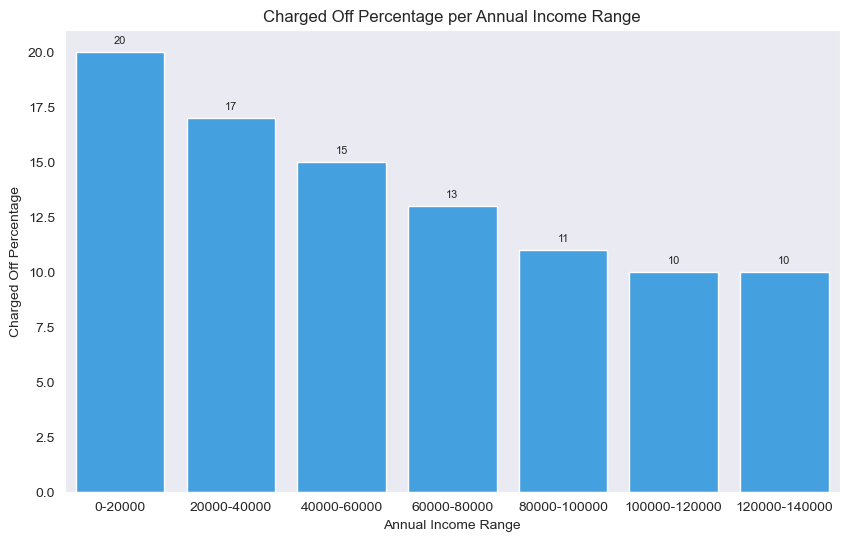

In [133]:
plt.figure(figsize=(10, 6))
plots = sns.barplot(x="annual_inc_cut", y="ChargedOffPercentage", data=income_ranges,palette=['#2BA5FA'])
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '0.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('Annual Income Range')
plt.ylabel('Charged Off Percentage')
plt.title('Charged Off Percentage per Annual Income Range')
plt.show()

**_Observation:_** _Charged off percentage reduced with increasing income, beyond 80000 income it remained close to 11%_

In [135]:
# Lets calculate ChargedOffPercentage across all loan amount range
loan_amnt_ranges = df_loan.groupby(['loan_amnt_cut', 'loan_status'])['loan_status'].count().unstack().fillna(0).reset_index()
loan_amnt_ranges['Total'] = loan_amnt_ranges['Charged Off'] + loan_amnt_ranges['Current'] + loan_amnt_ranges['Fully Paid']
loan_amnt_ranges['ChargedOffPercentage'] = round(loan_amnt_ranges['Charged Off'] / loan_amnt_ranges['Total'] * 100)
loan_amnt_ranges.sort_values('ChargedOffPercentage', ascending=False)
loan_amnt_ranges

loan_status,loan_amnt_cut,Charged Off,Current,Fully Paid,Total,ChargedOffPercentage
0,0-5000,1260,94,7806,9160,14.0
1,5000-10000,1531,149,10391,12071,13.0
2,10000-15000,983,278,6017,7278,14.0
3,15000-20000,657,214,3097,3968,17.0
4,20000-25000,431,137,1671,2239,19.0
5,25000-30000,112,54,389,555,20.0
6,30000-35000,129,57,297,483,27.0


**_Lets plot ChargedOffPercentage across all loan amount range_**

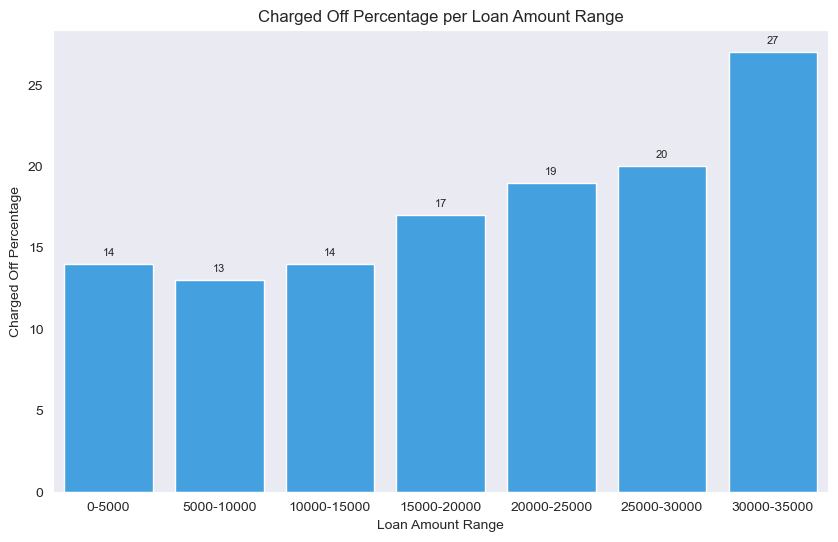

In [137]:
plt.figure(figsize=(10, 6))
plots = sns.barplot(x="loan_amnt_cut", y="ChargedOffPercentage", data=loan_amnt_ranges,palette=['#2BA5FA'])
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '0.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('Loan Amount Range')
plt.ylabel('Charged Off Percentage')
plt.title('Charged Off Percentage per Loan Amount Range')
plt.show()

**_Observation:_** _Charged off percentage increased with increase in loan amount_

In [139]:
# Lets calculate ChargedOffPercentage across all interest rate range
int_rate_ranges = df_loan.groupby(['int_rate_cut', 'loan_status'])['loan_status'].count().unstack().fillna(0).reset_index()
int_rate_ranges['Total'] = int_rate_ranges['Charged Off'] + int_rate_ranges['Current'] + int_rate_ranges['Fully Paid']
int_rate_ranges['ChargedOffPercentage'] = round(int_rate_ranges['Charged Off'] / int_rate_ranges['Total'] * 100)
int_rate_ranges.sort_values('ChargedOffPercentage', ascending=False)
int_rate_ranges

loan_status,int_rate_cut,Charged Off,Current,Fully Paid,Total,ChargedOffPercentage
0,5-7.5,239,6,4702,4947,5.0
1,7.5-10,523,66,5806,6395,8.0
2,10-12.5,1124,230,7299,8653,13.0
3,12.5-15,1359,227,6702,8288,16.0
4,15-17.5,1065,188,3521,4774,22.0
5,17.5-20,536,190,1263,1989,27.0
6,20-22.5,230,67,348,645,36.0
7,22.5-25,27,9,27,63,43.0


**_Lets plot ChargedOffPercentage across all interest rate range_**

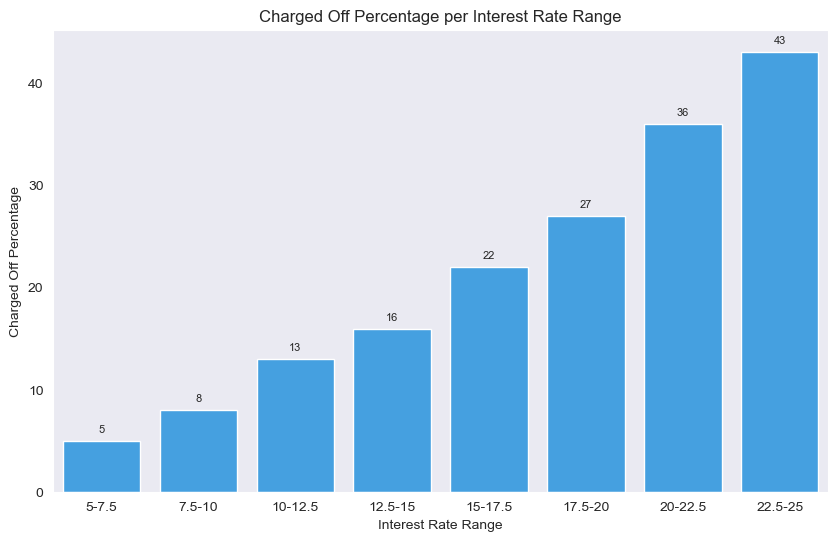

In [141]:
plt.figure(figsize=(10, 6))
plots = sns.barplot(x="int_rate_cut", y="ChargedOffPercentage", data=int_rate_ranges,palette=['#2BA5FA'])
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '0.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('Interest Rate Range')
plt.ylabel('Charged Off Percentage')
plt.title('Charged Off Percentage per Interest Rate Range')
plt.show()

**_Observation:_** _Charged off percentage increased with increase in interest rate_

In [143]:
#Lets calculate ChargedOffPercentage across all revol_util range
revol_util_ranges = df_loan.groupby(['revol_util_cut', 'loan_status'])['loan_status'].count().unstack().fillna(0).reset_index()
revol_util_ranges['Total'] = revol_util_ranges['Charged Off'] + revol_util_ranges['Current'] + revol_util_ranges['Fully Paid']
revol_util_ranges['ChargedOffPercentage'] = round(revol_util_ranges['Charged Off'] / revol_util_ranges['Total'] * 100)
revol_util_ranges.sort_values('ChargedOffPercentage', ascending=False)
revol_util_ranges

loan_status,revol_util_cut,Charged Off,Current,Fully Paid,Total,ChargedOffPercentage
0,0-15,422,83,4291,4796,9.0
1,15-30,571,133,4501,5205,11.0
2,30-45,733,153,4860,5746,13.0
3,45-60,880,171,4913,5964,15.0
4,60-75,926,187,4443,5556,17.0
5,75-90,873,162,3856,4891,18.0
6,90-100,563,71,2066,2700,21.0


**_Lets plot ChargedOffPercentage across all Revolving line utilization range_**

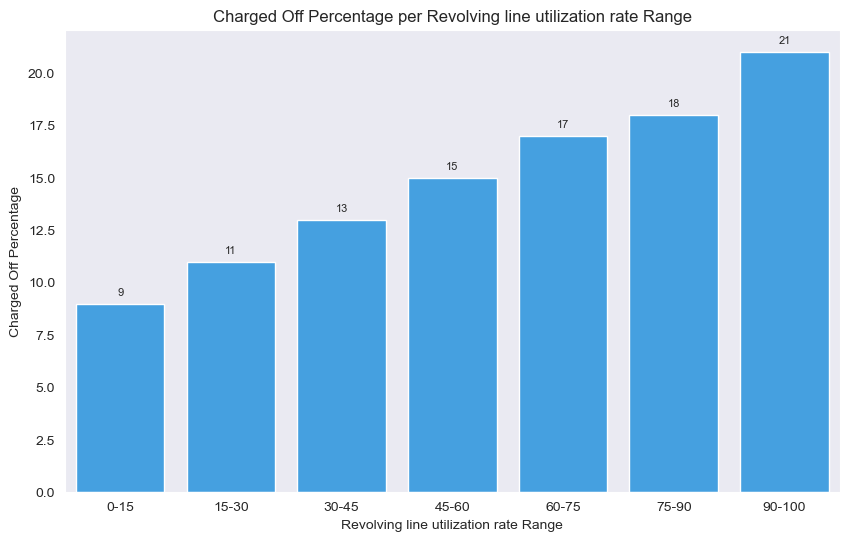

In [145]:
plt.figure(figsize=(10, 6))
plots = sns.barplot(x="revol_util_cut", y="ChargedOffPercentage", data=revol_util_ranges,palette=['#2BA5FA'])
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '0.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('Revolving line utilization rate Range')
plt.ylabel('Charged Off Percentage')
plt.title('Charged Off Percentage per Revolving line utilization rate Range')
plt.show()

**_Observation:_** _Charged Off Percentage increased with increase in revolving line utilization rate Range_

In [147]:
# Lets calculate ChargedOffPercentage across all dti range
dti_ranges = df_loan.groupby(['dti_cut', 'loan_status'])['loan_status'].count().unstack().fillna(0).reset_index()
dti_ranges['Total'] = dti_ranges['Charged Off'] + dti_ranges['Current'] + dti_ranges['Fully Paid']
dti_ranges['ChargedOffPercentage'] = round(dti_ranges['Charged Off'] / dti_ranges['Total'] * 100)
dti_ranges.sort_values('ChargedOffPercentage', ascending=False)
dti_ranges

loan_status,dti_cut,Charged Off,Current,Fully Paid,Total,ChargedOffPercentage
0,0-4,424,57,2878,3359,13.0
1,4-8,624,101,4450,5175,12.0
2,8-12,896,187,5650,6733,13.0
3,12-16,1054,188,6013,7255,15.0
4,16-20,999,190,5211,6400,16.0
5,20-24,846,173,4085,5104,17.0
6,24-28,212,71,1089,1372,15.0
7,28-30,20,11,150,181,11.0


**_Lets plot ChargedOffPercentage across all dti range_**

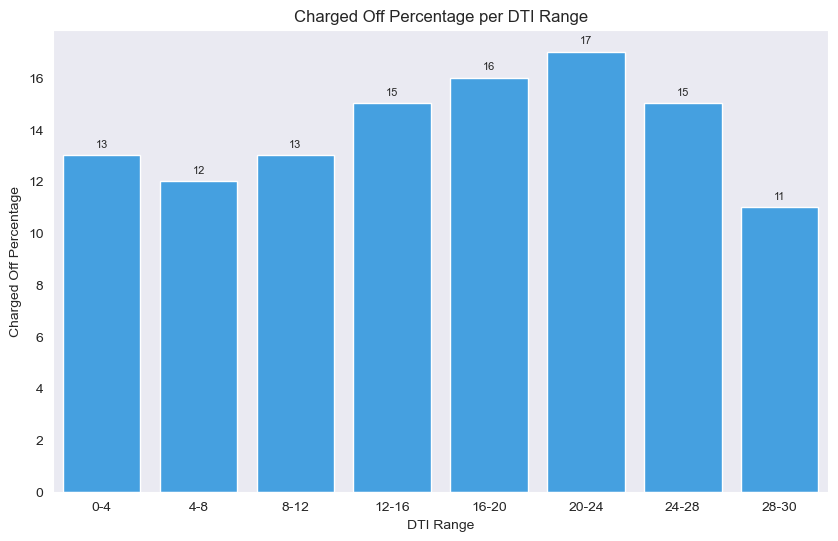

In [149]:
plt.figure(figsize=(10, 6))
plots = sns.barplot(x="dti_cut", y="ChargedOffPercentage", data=dti_ranges,palette=['#2BA5FA'])
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '0.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('DTI Range')
plt.ylabel('Charged Off Percentage')
plt.title('Charged Off Percentage per DTI Range')
plt.show()

**_Observation:_** _Charged off percentage increased with debt to income ratio range, but beyond 24 it again reduced_

In [151]:
# Lets calculate ChargedOffPercentage across all Public Bankruptcy Records
pub_rec_bankruptcies_df = df_loan.groupby(['pub_rec_bankruptcies', 'loan_status'])['loan_status'].count().unstack().fillna(0).reset_index()
pub_rec_bankruptcies_df['Total'] = pub_rec_bankruptcies_df['Charged Off'] + pub_rec_bankruptcies_df['Current'] + pub_rec_bankruptcies_df['Fully Paid']
pub_rec_bankruptcies_df['ChargedOffPercentage'] = round(pub_rec_bankruptcies_df['Charged Off'] / pub_rec_bankruptcies_df['Total'] * 100)
pub_rec_bankruptcies_df.sort_values('ChargedOffPercentage', ascending=False)
pub_rec_bankruptcies_df

loan_status,pub_rec_bankruptcies,Charged Off,Current,Fully Paid,Total,ChargedOffPercentage
0,0.0,4747,947,28443,34137,14.0
1,1.0,354,35,1222,1611,22.0
2,2.0,2,1,3,6,33.0


**_Lets plot ChargedOffPercentage across all Public Bankruptcy Records_**

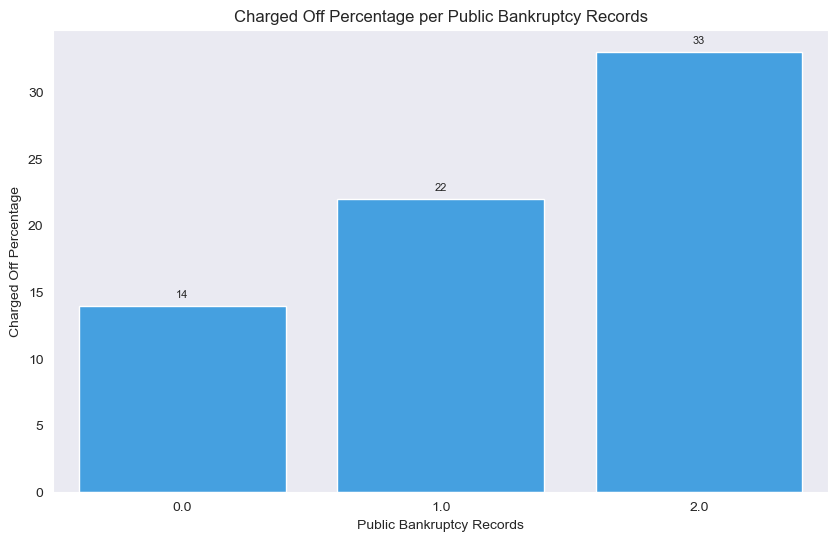

In [153]:
plt.figure(figsize=(10, 6))
plots = sns.barplot(x="pub_rec_bankruptcies", y="ChargedOffPercentage", data=pub_rec_bankruptcies_df,palette=['#2BA5FA'])
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '0.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('Public Bankruptcy Records')
plt.ylabel('Charged Off Percentage')
plt.title('Charged Off Percentage per Public Bankruptcy Records')
plt.show()

**_Observation:_** _Charge off percentage increased with increase in public bankruptcy records._
_<br>As number of bankruptcy records available are very less, this observation may not be reliable_

In [155]:
# Lets calculate ChargedOffPercentage across all issue_year
issue_year_df = df_loan.groupby(['issue_year', 'loan_status'])['loan_status'].count().unstack().fillna(0).reset_index()
issue_year_df['Total'] = issue_year_df['Charged Off'] + issue_year_df['Current'] + issue_year_df['Fully Paid']
issue_year_df['ChargedOffPercentage'] = round(issue_year_df['Charged Off'] / issue_year_df['Total'] * 100)
issue_year_df.sort_values('ChargedOffPercentage', ascending=False)
issue_year_df

loan_status,issue_year,Charged Off,Current,Fully Paid,Total,ChargedOffPercentage
0,2007,39.0,0.0,175.0,214.0,18.0
1,2008,210.0,0.0,1182.0,1392.0,15.0
2,2009,520.0,0.0,3678.0,4198.0,12.0
3,2010,1339.0,0.0,9087.0,10426.0,13.0
4,2011,2995.0,983.0,15546.0,19524.0,15.0


**_Lets plot ChargedOffPercentage across all issue_year_**

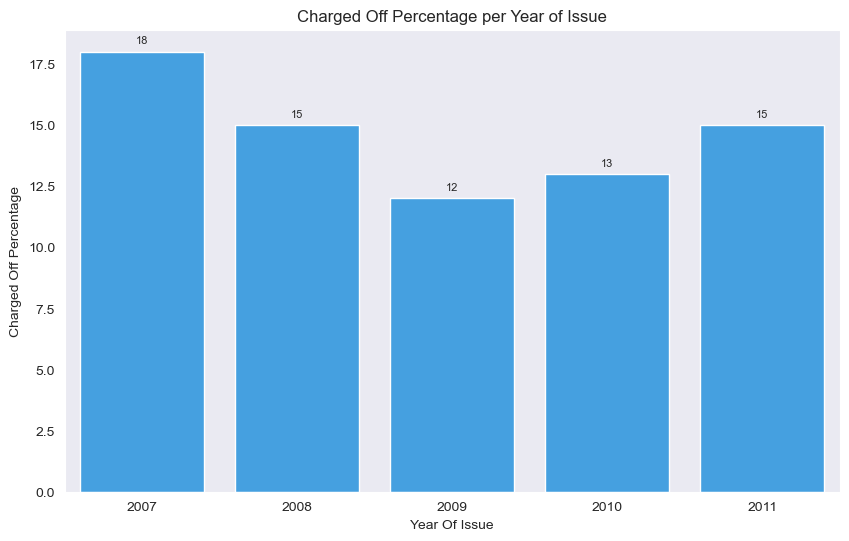

In [157]:
plt.figure(figsize=(10, 6))
plots = sns.barplot(x="issue_year", y="ChargedOffPercentage", data=issue_year_df,palette=['#2BA5FA'])
for bar in plots.patches:
    plots.annotate(format(bar.get_height(), '0.0f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=8, xytext=(0, 8),
                   textcoords='offset points')
plt.xlabel('Year Of Issue')
plt.ylabel('Charged Off Percentage')
plt.title('Charged Off Percentage per Year of Issue')
plt.show()

**_Observation:_** _Charged off percentage reduced from 2007 to 2010, but increased again at 2011_